In [96]:
# importing the relevant libraries for the code to work
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# importing the data needed for the model
dataset = pd.read_csv('C:\\HSBC AM Data Analytics Technical Test\\Data\\ABC_Level_One_Tick_Data.csv')

# inspecting the data in order to know from which columns the necessary extracts need to be made
dataset.head()

,Time_Hour,Instrument_Code,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,MinTimeHour,MaxTimeHour,Avg_Bid_Ask_Spread
0,2018-01-04 08:00:00+00:00,ABC,53.545455,54.254545,53.518182,54.209091,53.951161,53.989410,3365,254615.54550,1.663332e+09,2020-01-02 08:00:02.736099+00:00,2020-01-02 08:59:58.820761+00:00,-0.014760
1,2018-01-04 09:00:00+00:00,ABC,54.209091,54.363636,54.100000,54.290909,54.224500,54.225053,1368,77817.18182,5.105765e+08,2020-01-02 09:00:11.940563+00:00,2020-01-02 09:59:58.746897+00:00,0.013481
2,2018-01-04 10:00:00+00:00,ABC,54.281818,54.318182,54.218182,54.245455,54.265969,54.266231,909,58191.72727,3.820993e+08,2020-01-02 10:00:03.826511+00:00,2020-01-02 10:59:59.987086+00:00,0.011557
3,2018-01-04 11:00:00+00:00,ABC,54.245455,54.272727,54.118182,54.136364,54.183729,54.182949,501,34762.09091,2.279050e+08,2020-01-02 11:00:02.479285+00:00,2020-01-02 11:59:48.672869+00:00,0.011537
4,2018-01-04 12:00:00+00:00,ABC,54.181818,54.204591,54.100000,54.177318,54.158934,54.156843,474,34644.18182,2.270226e+08,2020-01-02 12:02:18.720769+00:00,2020-01-02 12:59:28.065067+00:00,-0.014078


In [97]:
# Working out the Time Horizon by subtracting two time fields - The data type of the resulting number of days needs to be changed to integer
Time_Horizon = (pd.to_datetime(dataset['MaxTimeHour']).dt.date) - (pd.to_datetime(dataset['Time_Hour']).dt.date)
Time_Horizon = Time_Horizon.dt.days.astype('int16')

# All the data needed to train the model is placed in X (Volume and Time Horizon) and the results that needs to be mapped upon is placed in y (Price)
X = pd.DataFrame({'Volume': dataset['Volume'], 'Time_Horizon': Time_Horizon}, columns=['Volume','Time_Horizon'])
y = dataset['VWAP']

# The sample dataset now needs to be divided into a training dataset and a testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
# The sample data now needs to go through our random forest algorithm to solve the regression problem - at this point, the algorithm will be tried for a number of estimators (random forest trees). For this model, we will train the algorithm for a range of trees between 2 and 100.
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [99]:
# Once the data has been trained, we can then have a look at the root mean squared error. The aim of the training is to modify the number of estimators (Trees) until the Root Mean Squared Error is minimised. This is shown by the graph in the next section.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.724429823563292
Mean Squared Error: 53.53996176484672
Root Mean Squared Error: 7.317100639245488


Text(0, 0.5, 'Root Mean Squared Error')

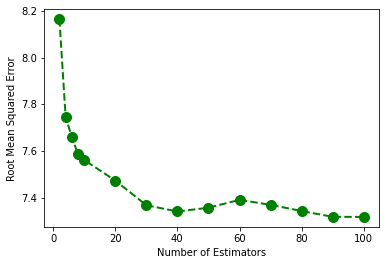

In [100]:
# It can be seen that the root mean squared error does decrease with an increased number of estimators and reaches a low with around 40 estimators. Hence, the number of estimators to be used is 40, since the benefit of increasing the amount significantly does not provide a significant decrease in the root mean squared error value.
import matplotlib.pyplot as py
py.plot([2, 4, 6, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], [8.164924378, 7.745456001, 7.660487347, 7.584890717, 7.561141168, 7.472894223, 7.367184213, 7.340381671, 7.356625168, 7.390222732, 7.368887326, 7.342337919, 7.317433793, 7.317100639], 'go--', linewidth=2, markersize=10)
py.xlabel('Number of Estimators')
py.ylabel('Root Mean Squared Error')